# Vehicle Choice Prediction.

**Problem Overview:**

> XYZ Motor Manufactures has collected some data samples from their existing custumers to determine what kind of cars are being purchased by what kind of demogrraphic.



**Task:**

> To predict the Choice of Vehicle by building a Machine Learning Model.



#Importing the required libraries.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,classification_report,confusion_matrix,accuracy_score,precision_score, recall_score,f1_score

#Loading the dataset

In [80]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [81]:
train_data.shape

(30000, 13)

In [82]:
test_data.shape

(5000, 12)

In [83]:
train_data.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


#Data Preprocessing

**Basic information of the data using the info() function.**

In [84]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


null values in the dataset need to treated.

**The unique values and its count of each column.**

In [85]:
for i in train_data.columns:
  print(train_data[i].value_counts())
  print('---------------------------------------------')

CusID_00000    1
CusID_19996    1
CusID_20008    1
CusID_20007    1
CusID_20006    1
              ..
CusID_09995    1
CusID_09994    1
CusID_09993    1
CusID_09992    1
CusID_29999    1
Name: CustomerID, Length: 30000, dtype: int64
---------------------------------------------
31.0    1301
27.0    1276
22.0    1266
33.0    1253
23.0    1237
20.0    1232
32.0    1228
28.0    1220
35.0    1217
34.0    1214
30.0    1211
24.0    1207
26.0    1182
21.0    1171
29.0    1166
25.0    1151
38.0     768
37.0     730
36.0     723
39.0     718
15.0     513
17.0     510
19.0     498
18.0     479
16.0     439
45.0     307
49.0     281
40.0     273
41.0     270
48.0     267
46.0     267
50.0     264
42.0     261
43.0     257
44.0     255
47.0     253
54.0     181
55.0     178
57.0     176
51.0     174
52.0     172
60.0     170
59.0     166
56.0     166
53.0     163
58.0     150
Name: Age, dtype: int64
---------------------------------------------
Female           12588
Male             12316
Not_Spe

Several invalid entries can be observed in many columns.

**Replacing invalid entries of 'Gender' with NaN.**

In [86]:
train_data.Gender.unique()

array(['Male', 'Female', 'Not_Specified', nan, 'ZH#C@', 'VG?H%', 'SA#?I',
       'TD%Q@'], dtype=object)

In [87]:
train_data.Gender.isna().sum()

417

In [88]:
train_data['Gender']=train_data.Gender.replace({'ZH#C@', 'VG?H%', 'SA#?I', 'TD%Q@'}, np.NaN)
train_data.Gender.unique()

array(['Male', 'Female', 'Not_Specified', nan], dtype=object)

In [89]:
train_data.Gender.isna().sum()

421

**Replacing invalid entries of 'City' with NaN.**

In [90]:
train_data.City.unique()

array(['New York City', 'Paris', 'Vancouver', 'Barcelona', 'Los Angeles',
       'Toronto', 'Munich', 'Chennai', 'Florence', 'Budapest', 'Kolkata',
       'San Francisco', 'London', 'Mumbai', 'Taipei', 'Kuala Lampur',
       'Shinjuku', 'Perth', 'Sydney', 'Berlin', 'Vienna', 'Delhi', nan,
       '#VPI@', '#B?TL', '#XY@G', 'P?IX@'], dtype=object)

In [91]:
train_data['City']=train_data.City.replace({'#VPI@', '#B?TL', '#XY@G', 'P?IX@'}, np.NaN)
train_data.City.unique()

array(['New York City', 'Paris', 'Vancouver', 'Barcelona', 'Los Angeles',
       'Toronto', 'Munich', 'Chennai', 'Florence', 'Budapest', 'Kolkata',
       'San Francisco', 'London', 'Mumbai', 'Taipei', 'Kuala Lampur',
       'Shinjuku', 'Perth', 'Sydney', 'Berlin', 'Vienna', 'Delhi', nan],
      dtype=object)

**Replacing invalid entries of 'is_Married' with NaN.**

In [92]:
train_data.is_Married.unique()

array(['Divorced', 'Single', 'Married', nan, 'T@JF%', 'ORV@#', '?D@NF',
       'S#TF%', '@XTZ?'], dtype=object)

In [93]:
train_data['is_Married']=train_data.is_Married.replace({'T@JF%', 'ORV@#', '?D@NF', 'S#TF%', '@XTZ?'}, np.NaN)
train_data.is_Married.unique()

array(['Divorced', 'Single', 'Married', nan], dtype=object)

**Replacing invalid entries of 'job' with NaN.**

In [94]:
train_data.job.unique()

array(['Service', 'Business', 'Student', nan, 'Undisclosed', 'KBN?#',
       'UZT?@', 'Z@B%L', 'TV%?N'], dtype=object)

In [95]:
train_data['job']=train_data.job.replace({'KBN?#', 'UZT?@', 'Z@B%L', 'TV%?N'}, np.NaN)
train_data.job.unique()

array(['Service', 'Business', 'Student', nan, 'Undisclosed'], dtype=object)

**Replacing invalid entries of 'is_physically_ok' with NaN.**

In [96]:
train_data.is_physically_ok.unique()

array(['Yes', 'No', nan, 'Y%?UH', 'UY%X@'], dtype=object)

In [97]:
train_data['is_physically_ok']=train_data.is_physically_ok.replace({'Y%?UH', 'UY%X@'}, np.NaN)
train_data.is_physically_ok.unique()

array(['Yes', 'No', nan], dtype=object)

**Replacing invalid entries of 'has_taken_car_loan' with NaN.**



In [98]:
train_data.has_taken_car_loan.unique()

array(['Yes', 'No', nan, '@W%GO', '?N%IY', 'AF?V%'], dtype=object)

In [99]:
train_data['has_taken_car_loan']=train_data.has_taken_car_loan.replace({'@W%GO', '?N%IY', 'AF?V%'}, np.NaN)
train_data.has_taken_car_loan.unique()

array(['Yes', 'No', nan], dtype=object)

**Replacing invalid entries of 'preferable_fuel_choice' with NaN.**

In [100]:
train_data.preferable_fuel_choice.unique()

array(['Hybrid', 'Petrol', 'Diesel', 'EV', nan, 'SVY@#', 'IX%K#', '#%KXJ'],
      dtype=object)

In [101]:
train_data['preferable_fuel_choice']=train_data.preferable_fuel_choice.replace({'SVY@#', 'IX%K#', '#%KXJ'}, np.NaN)
train_data.preferable_fuel_choice.unique()

array(['Hybrid', 'Petrol', 'Diesel', 'EV', nan], dtype=object)

##Dealing with Null Values.

In [102]:
series = train_data.isna().sum()
missing_total = series[series.values>0]

series1 = round(train_data.isna().mean()*100, 4)
missing_percentage = series1[series1.values>0]

df = pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_total', 'Missing_percentage'])
df

,Missing_total,Missing_percentage
Age,439,1.4633
Gender,421,1.4033
City,427,1.4233
is_Married,425,1.4167
family_size,414,1.3800
height,431,1.4367
annual_income,419,1.3967
job,432,1.4400
is_physically_ok,424,1.4133
has_taken_car_loan,434,1.4467


**Since the missing percentage is low, dropping all the missing values in the data.**

In [103]:
train_data = train_data.dropna(how ='any')
train_data.isna().sum().sum()

0

In [104]:
train_data.shape

(25606, 13)

**Checking for duplicated rows.**

In [105]:
train_data.duplicated().sum()

0

There are no duplicates in the data.

**Some Statistical description of the numerical data.**

In [106]:
train_data.describe()

,Age,family_size,height,annual_income
count,25606.000000,25606.000000,25606.000000,25606.000000
mean,31.035265,2.879052,153.011247,84735.078497
std,9.898874,1.633333,11.156144,60568.122478
min,15.000000,1.000000,130.000000,2000.000000
25%,24.000000,1.000000,144.000000,37000.000000
50%,30.000000,3.000000,152.000000,82310.000000
75%,36.000000,4.000000,160.000000,128200.000000
max,60.000000,6.000000,180.000000,499000.000000


**Histogram of the numerical variables.**


##Outliers

In [107]:
nums = train_data.select_dtypes(include=['float64'])
print(nums.shape)
print(nums.columns)

(25606, 4)
Index(['Age', 'family_size', 'height', 'annual_income'], dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

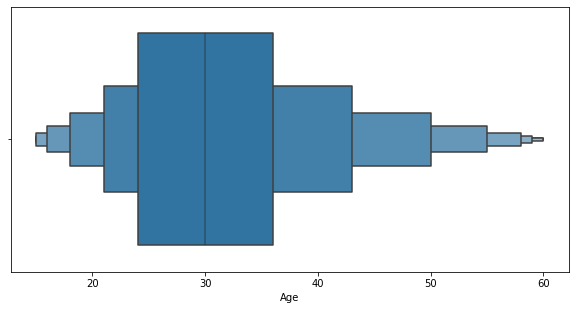

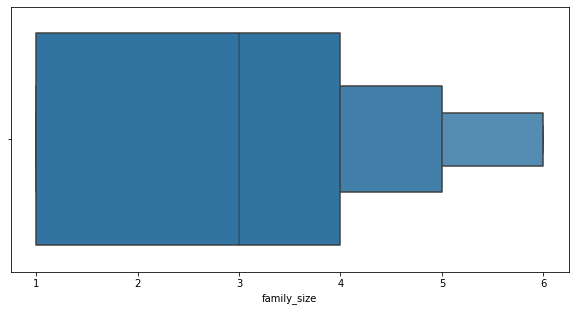

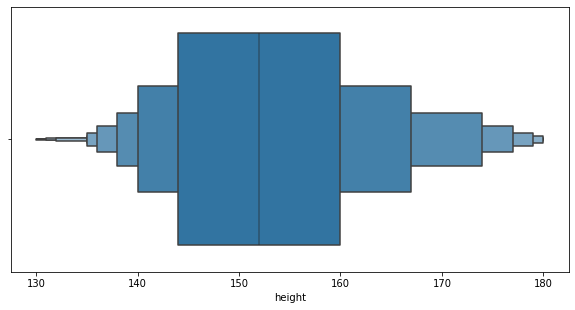

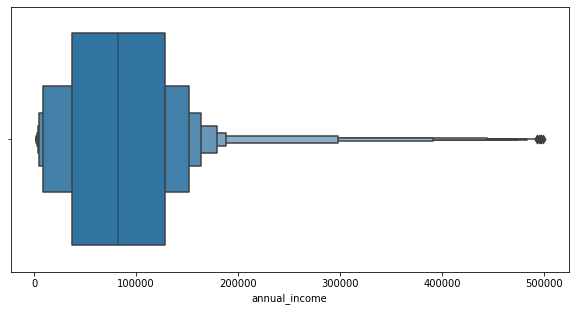

In [108]:
for index,column in enumerate(nums):
    fig=plt.figure(figsize=(10,40))
    plt.subplot(7,1,index+1)
    sns.boxenplot(nums[column])
    plt.xlabel(column)

In [109]:
def outliers(x):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outlier_values = x[(x<min_range) | (x>max_range)]
    return outlier_values

In [110]:
for i in nums:
  outlier_values = outliers(nums[i])
  print(outlier_values)

2        55.0
19       56.0
50       55.0
54       60.0
64       56.0
         ... 
29851    59.0
29925    58.0
29953    56.0
29976    56.0
29979    56.0
Name: Age, Length: 878, dtype: float64
Series([], Name: family_size, dtype: float64)
Series([], Name: height, dtype: float64)
54       303500.0
89       286600.0
149      412400.0
242      339900.0
384      390600.0
           ...   
29072    476900.0
29356    420400.0
29384    385800.0
29583    414700.0
29618    319000.0
Name: annual_income, Length: 222, dtype: float64




> No outliers are printed for the variables 'height' and 'family_size'.

> Outliers of 'Age' and 'annual_income' can be removed for better prediction of the model.





In [111]:
list1 = outliers(train_data['Age']).index.to_list()
list2 = outliers(train_data['annual_income']).index.to_list()
list_outliers = list1 + list2
train_data = train_data.drop(list_outliers)

In [112]:
outliers(train_data['Age'])

96       54.0
294      54.0
566      54.0
633      54.0
777      54.0
         ... 
29322    54.0
29721    54.0
29872    54.0
29876    54.0
29920    54.0
Name: Age, Length: 139, dtype: float64

In [113]:
outliers(train_data['annual_income'])

14815    263700.0
Name: annual_income, dtype: float64

In [114]:
train_data.shape

(24586, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


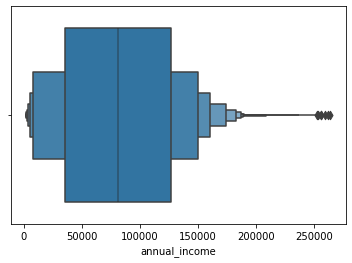

In [115]:
sns.boxenplot(train_data['annual_income'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


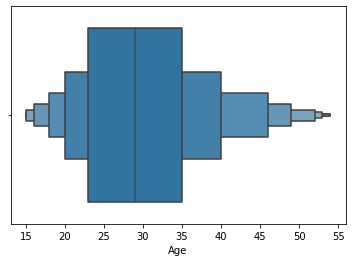

In [116]:
sns.boxenplot(train_data['Age'])

**Normalising the numerical variables.**


In [117]:
nums_arr = normalize(nums)
nums = pd.DataFrame(nums_arr, columns=nums.columns)
nums.head()

,Age,family_size,height,annual_income
0,0.001118,0.000062,0.004969,0.999987
1,0.001666,0.000111,0.015887,0.999872
2,0.000361,0.000013,0.001102,0.999999
3,0.000163,0.000021,0.001169,0.999999
4,0.000604,0.000026,0.003858,0.999992


**Encoding**

In [118]:
train_data.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

**Label Encoding 'City' and 'vehicle_choice'**

In [119]:
le = LabelEncoder()
train_data['City'] = le.fit_transform(train_data['City'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Barcelona': 0, 'Berlin': 1, 'Budapest': 2, 'Chennai': 3, 'Delhi': 4, 'Florence': 5, 'Kolkata': 6, 'Kuala Lampur': 7, 'London': 8, 'Los Angeles': 9, 'Mumbai': 10, 'Munich': 11, 'New York City': 12, 'Paris': 13, 'Perth': 14, 'San Francisco': 15, 'Shinjuku': 16, 'Sydney': 17, 'Taipei': 18, 'Toronto': 19, 'Vancouver': 20, 'Vienna': 21}


In [120]:
le = LabelEncoder()
train_data['vehicle_choice'] = le.fit_transform(train_data['vehicle_choice'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Compact Sedan': 0, 'Compact Utility Vehicle': 1, 'Convertible': 2, 'Coupe': 3, 'Crossover': 4, 'Hatchback': 5, 'Luxury Coupe': 6, 'Luxury Sedan': 7, 'Minivan': 8, 'Pickup-Truck': 9, 'Sedan': 10, 'Sports Coupe': 11, 'Sports Sedan': 12, 'Sports Utility Vehicle': 13, 'Sportscar': 14, 'Station Wagon': 15, 'Utility Vehicle': 16, 'Utility vehicle': 17}


**One Hot Encoding of the remaining categorical columns.**

In [121]:
train_data1 = pd.get_dummies(train_data[['Age', 'Gender','is_Married','job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice']])

In [122]:
train_data = pd.concat([train_data['CustomerID'], train_data1, train_data['City'], train_data['vehicle_choice']], axis=1)

In [123]:
train_data.head()

,CustomerID,Age,Gender_Female,Gender_Male,Gender_Not_Specified,is_Married_Divorced,is_Married_Married,is_Married_Single,job_Business,job_Service,...,is_physically_ok_No,is_physically_ok_Yes,has_taken_car_loan_No,has_taken_car_loan_Yes,preferable_fuel_choice_Diesel,preferable_fuel_choice_EV,preferable_fuel_choice_Hybrid,preferable_fuel_choice_Petrol,City,vehicle_choice
0,CusID_00000,36.0,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,12,10
1,CusID_00001,15.0,1,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,1,12,1
3,CusID_00003,23.0,0,1,0,1,0,0,1,0,...,0,1,1,0,1,0,0,0,20,14
4,CusID_00004,23.0,0,0,1,0,0,1,0,1,...,0,1,0,1,0,0,1,0,20,13
6,CusID_00006,35.0,0,0,1,0,1,0,1,0,...,0,1,1,0,0,0,0,1,0,4


#Preparing test data for modelling

In [124]:
test_data.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,Female,Delhi,Married,6.0,142.0,150800.0,Service,Yes,No,Diesel
1,CusID_30001,22.0,Male,Perth,Divorced,4.0,155.0,167000.0,Service,Yes,No,Petrol
2,CusID_30002,46.0,Female,Barcelona,Married,2.0,NaN,66000.0,Service,Yes,No,Petrol
3,CusID_30003,35.0,NaN,Kuala Lampur,Single,1.0,137.0,71820.0,Business,Yes,NaN,Petrol
4,CusID_30004,48.0,Male,Sydney,Married,3.0,162.0,6500.0,Service,Yes,Yes,Hybrid


In [125]:
test_data.Gender.unique()

array(['Female', 'Male', nan, 'Not_Specified', 'EV%N?', 'N%E#G'],
      dtype=object)

In [126]:
test_data['Gender']=test_data.Gender.replace({'EV%N?', 'N%E#G'}, np.NaN)
test_data.Gender.unique()

array(['Female', 'Male', nan, 'Not_Specified'], dtype=object)

In [127]:
test_data.City.unique()

array(['Delhi', 'Perth', 'Barcelona', 'Kuala Lampur', 'Sydney',
       'Vancouver', 'New York City', 'Kolkata', 'Florence', 'Mumbai',
       'Chennai', 'Toronto', 'Budapest', 'Taipei', 'Vienna',
       'San Francisco', 'Los Angeles', 'Shinjuku', 'London', 'Berlin',
       'Paris', 'Munich', nan, '%?ACE'], dtype=object)

In [128]:
test_data['City']=test_data.City.replace({'%?ACE'}, np.NaN)
test_data.City.unique()

array(['Delhi', 'Perth', 'Barcelona', 'Kuala Lampur', 'Sydney',
       'Vancouver', 'New York City', 'Kolkata', 'Florence', 'Mumbai',
       'Chennai', 'Toronto', 'Budapest', 'Taipei', 'Vienna',
       'San Francisco', 'Los Angeles', 'Shinjuku', 'London', 'Berlin',
       'Paris', 'Munich', nan], dtype=object)

In [129]:
test_data.is_physically_ok.unique()

array(['Yes', 'No', nan, 'K%#MY'], dtype=object)

In [130]:
test_data['is_physically_ok']=test_data.is_physically_ok.replace({'K%#MY'}, np.NaN)
test_data.is_physically_ok.unique()

array(['Yes', 'No', nan], dtype=object)

In [131]:
test_data.has_taken_car_loan.unique()

array(['No', nan, 'Yes', 'U#@DX', 'DG?#H'], dtype=object)

In [132]:
test_data['has_taken_car_loan']=test_data.has_taken_car_loan.replace({'U#@DX', 'DG?#H'}, np.NaN)
test_data.has_taken_car_loan.unique()

array(['No', nan, 'Yes'], dtype=object)

In [133]:
test_data.preferable_fuel_choice.unique()

array(['Diesel', 'Petrol', 'Hybrid', 'EV', nan, 'FC?P%'], dtype=object)

In [134]:
test_data['preferable_fuel_choice']=test_data.preferable_fuel_choice.replace({'FC?P%'}, np.NaN)
test_data.preferable_fuel_choice.unique()

array(['Diesel', 'Petrol', 'Hybrid', 'EV', nan], dtype=object)

In [135]:
test_data.isna().sum()

CustomerID                 0
Age                       67
Gender                    83
City                      73
is_Married                85
family_size               73
height                    67
annual_income             78
job                       74
is_physically_ok          67
has_taken_car_loan        63
preferable_fuel_choice    84
dtype: int64

In [136]:
a = ['Age', 'annual_income', 'family_size', 'height']
for i in a:
  test_data[i] = test_data[i].fillna(test_data[i].median())

In [137]:
b = ['Gender', 'City','is_Married', 'job', 'is_physically_ok', 'has_taken_car_loan', 'preferable_fuel_choice']
for i in b:
  test_data[i] = test_data[i].fillna(test_data[i].mode()[0])

In [138]:
test_data.isna().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
dtype: int64

In [139]:
le = LabelEncoder()
test_data['City'] = le.fit_transform(test_data['City'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Barcelona': 0, 'Berlin': 1, 'Budapest': 2, 'Chennai': 3, 'Delhi': 4, 'Florence': 5, 'Kolkata': 6, 'Kuala Lampur': 7, 'London': 8, 'Los Angeles': 9, 'Mumbai': 10, 'Munich': 11, 'New York City': 12, 'Paris': 13, 'Perth': 14, 'San Francisco': 15, 'Shinjuku': 16, 'Sydney': 17, 'Taipei': 18, 'Toronto': 19, 'Vancouver': 20, 'Vienna': 21}


In [140]:
test_data1 = pd.get_dummies(test_data[['Age', 'Gender','is_Married','job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice']])

In [141]:
test_data = pd.concat([test_data['CustomerID'], test_data1, test_data['City']], axis=1)

In [142]:
test_data.head()

,CustomerID,Age,Gender_Female,Gender_Male,Gender_Not_Specified,is_Married_Divorced,is_Married_Married,is_Married_Single,job_Business,job_Service,...,job_Undisclosed,is_physically_ok_No,is_physically_ok_Yes,has_taken_car_loan_No,has_taken_car_loan_Yes,preferable_fuel_choice_Diesel,preferable_fuel_choice_EV,preferable_fuel_choice_Hybrid,preferable_fuel_choice_Petrol,City
0,CusID_30000,32.0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,1,0,0,0,4
1,CusID_30001,22.0,0,1,0,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,14
2,CusID_30002,46.0,1,0,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,CusID_30003,35.0,1,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,7
4,CusID_30004,48.0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,17


#Modelling

In [143]:
train_data.columns

Index(['CustomerID', 'Age', 'Gender_Female', 'Gender_Male',
       'Gender_Not_Specified', 'is_Married_Divorced', 'is_Married_Married',
       'is_Married_Single', 'job_Business', 'job_Service', 'job_Student',
       'job_Undisclosed', 'is_physically_ok_No', 'is_physically_ok_Yes',
       'has_taken_car_loan_No', 'has_taken_car_loan_Yes',
       'preferable_fuel_choice_Diesel', 'preferable_fuel_choice_EV',
       'preferable_fuel_choice_Hybrid', 'preferable_fuel_choice_Petrol',
       'City', 'vehicle_choice'],
      dtype='object')

In [144]:
x = train_data[['Age', 'Gender_Female', 'Gender_Male', 'Gender_Not_Specified',
       'is_Married_Divorced', 'is_Married_Married', 'is_Married_Single',
       'job_Business', 'job_Service', 'job_Student', 'job_Undisclosed',
       'is_physically_ok_No', 'is_physically_ok_Yes', 'has_taken_car_loan_No',
       'has_taken_car_loan_Yes', 'preferable_fuel_choice_Diesel',
       'preferable_fuel_choice_EV', 'preferable_fuel_choice_Hybrid',
       'preferable_fuel_choice_Petrol', 'City']]
y = train_data['vehicle_choice']

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 42)

**RandomForestClassifier**


In [146]:
rf_cl = RandomForestClassifier()
rf_cl.fit(x_train,y_train)
y_pred = rf_cl.predict(x_test)

f1_score(y_test,y_pred, average='weighted')

0.5309451945365757

**prediction of the test data**

In [147]:
x.shape

(24586, 20)

In [148]:
test_data.shape

(5000, 21)

In [149]:
vehicle_choice = rf_cl.predict(test_data.drop('CustomerID', axis=1))

In [150]:
vehicle_choice

array([13,  7, 13, ..., 13,  1,  1])

**Test data with the target column predicted**

In [151]:
test_data['vehicle_choice'] = vehicle_choice
test_data.head()

,CustomerID,Age,Gender_Female,Gender_Male,Gender_Not_Specified,is_Married_Divorced,is_Married_Married,is_Married_Single,job_Business,job_Service,...,is_physically_ok_No,is_physically_ok_Yes,has_taken_car_loan_No,has_taken_car_loan_Yes,preferable_fuel_choice_Diesel,preferable_fuel_choice_EV,preferable_fuel_choice_Hybrid,preferable_fuel_choice_Petrol,City,vehicle_choice
0,CusID_30000,32.0,1,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,0,4,13
1,CusID_30001,22.0,0,1,0,1,0,0,0,1,...,0,1,1,0,0,0,0,1,14,7
2,CusID_30002,46.0,1,0,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,0,13
3,CusID_30003,35.0,1,0,0,0,0,1,1,0,...,0,1,1,0,0,0,0,1,7,2
4,CusID_30004,48.0,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,1,0,17,0


In [152]:
test_data.shape

(5000, 22)

In [153]:
final_format = test_data[['CustomerID', 'vehicle_choice']]
final_format

,CustomerID,vehicle_choice
0,CusID_30000,13
1,CusID_30001,7
2,CusID_30002,13
3,CusID_30003,2
4,CusID_30004,0
...,...,...
4995,CusID_34995,15
4996,CusID_34996,10
4997,CusID_34997,13
4998,CusID_34998,1


**Replacing the encoded 'vehicle_choice' into the original entries using the mapping printed during label encoding of 'vehicle_choice'**

In [154]:
{'Compact Sedan': 0, 'Compact Utility Vehicle': 1, 'Convertible': 2, 'Coupe': 3, 'Crossover': 4, 'Hatchback': 5, 'Luxury Coupe': 6, 'Luxury Sedan': 7, 'Minivan': 8, 'Pickup-Truck': 9, 'Sedan': 10, 'Sports Coupe': 11, 'Sports Sedan': 12, 'Sports Utility Vehicle': 13, 'Sportscar': 14, 'Station Wagon': 15, 'Utility Vehicle': 16, 'Utility vehicle': 17}

{'Compact Sedan': 0,
 'Compact Utility Vehicle': 1,
 'Convertible': 2,
 'Coupe': 3,
 'Crossover': 4,
 'Hatchback': 5,
 'Luxury Coupe': 6,
 'Luxury Sedan': 7,
 'Minivan': 8,
 'Pickup-Truck': 9,
 'Sedan': 10,
 'Sports Coupe': 11,
 'Sports Sedan': 12,
 'Sports Utility Vehicle': 13,
 'Sportscar': 14,
 'Station Wagon': 15,
 'Utility Vehicle': 16,
 'Utility vehicle': 17}

In [155]:
final_format['vehicle_choice'] = final_format['vehicle_choice'].replace({0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17},{'Compact Sedan', 'Compact Utility Vehicle', 'Convertible', 'Coupe', 'Crossover', 'Hatchback','Luxury Coupe','Luxury Sedan','Minivan','Pickup-Truck', 'Sedan','Sports Coupe','Sports Sedan','Sports Utility Vehicle','Sportscar','Station Wagon','Utility Vehicle', 'Utility vehicle' })
final_format

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,vehicle_choice
0,CusID_30000,Luxury Sedan
1,CusID_30001,Sports Sedan
2,CusID_30002,Luxury Sedan
3,CusID_30003,Compact Utility Vehicle
4,CusID_30004,Crossover
...,...,...
4995,CusID_34995,Utility vehicle
4996,CusID_34996,Pickup-Truck
4997,CusID_34997,Luxury Sedan
4998,CusID_34998,Sports Coupe


In [156]:
final_csv = final_format.to_csv('submission.csv')